In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [40]:
df=pd.read_csv('/content/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Preprocessing


In [41]:
y=df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [42]:
df=df.drop(['Survived','Cabin','Name','Ticket','Fare'],axis=1)
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,male,22.0,1,0,S
1,2,1,female,38.0,1,0,C
2,3,3,female,26.0,0,0,S
3,4,1,female,35.0,1,0,S
4,5,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,S
887,888,1,female,19.0,0,0,S
888,889,3,female,NaN,1,2,S
889,890,1,male,26.0,0,0,C


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1,22.0,1,0,2
1,2,1,0,38.0,1,0,0
2,3,3,0,26.0,0,0,2
3,4,1,0,35.0,1,0,2
4,5,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,2
887,888,1,0,19.0,0,0,2
888,889,3,0,NaN,1,2,2
889,890,1,1,26.0,0,0,0


In [46]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

MODEL

In [47]:
X=df

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=42)
X_train.shape, X_test.shape


((267, 7), (624, 7))

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [54]:
%%time
classifier_rf.fit(X_train, y_train)


CPU times: user 310 ms, sys: 9.76 ms, total: 320 ms
Wall time: 354 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [55]:
classifier_rf.oob_score_


0.7752808988764045

In [56]:
classifier_rf.score(X_test, y_test)

0.8173076923076923

In [57]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)


In [58]:
params = {
'max_depth': [2,3,5,10,20],
'min_samples_leaf': [5,10,20,50,100,200],
'n_estimators': [10,25,30,50,100,200]
}

In [60]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")


In [61]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 2.85 s, sys: 236 ms, total: 3.09 s
Wall time: 1min 38s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [62]:
grid_search.best_score_

0.8018430574400723

In [63]:
rf_best = grid_search.best_estimator_
rf_best


RandomForestClassifier(max_depth=2, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

[Text(0.5, 0.8333333333333334, 'Age <= 31.5\ngini = 0.482\nsamples = 164\nvalue = [159, 108]\nclass = Survived'),
 Text(0.25, 0.5, 'Age <= 27.5\ngini = 0.448\nsamples = 109\nvalue = [115, 59]\nclass = Survived'),
 Text(0.125, 0.16666666666666666, 'gini = 0.481\nsamples = 55\nvalue = [55, 37]\nclass = Survived'),
 Text(0.375, 0.16666666666666666, 'gini = 0.393\nsamples = 54\nvalue = [60, 22]\nclass = Survived'),
 Text(0.75, 0.5, 'PassengerId <= 224.5\ngini = 0.499\nsamples = 55\nvalue = [44, 49]\nclass = Sunk'),
 Text(0.625, 0.16666666666666666, 'gini = 0.42\nsamples = 11\nvalue = [14, 6]\nclass = Survived'),
 Text(0.875, 0.16666666666666666, 'gini = 0.484\nsamples = 44\nvalue = [30, 43]\nclass = Sunk')]

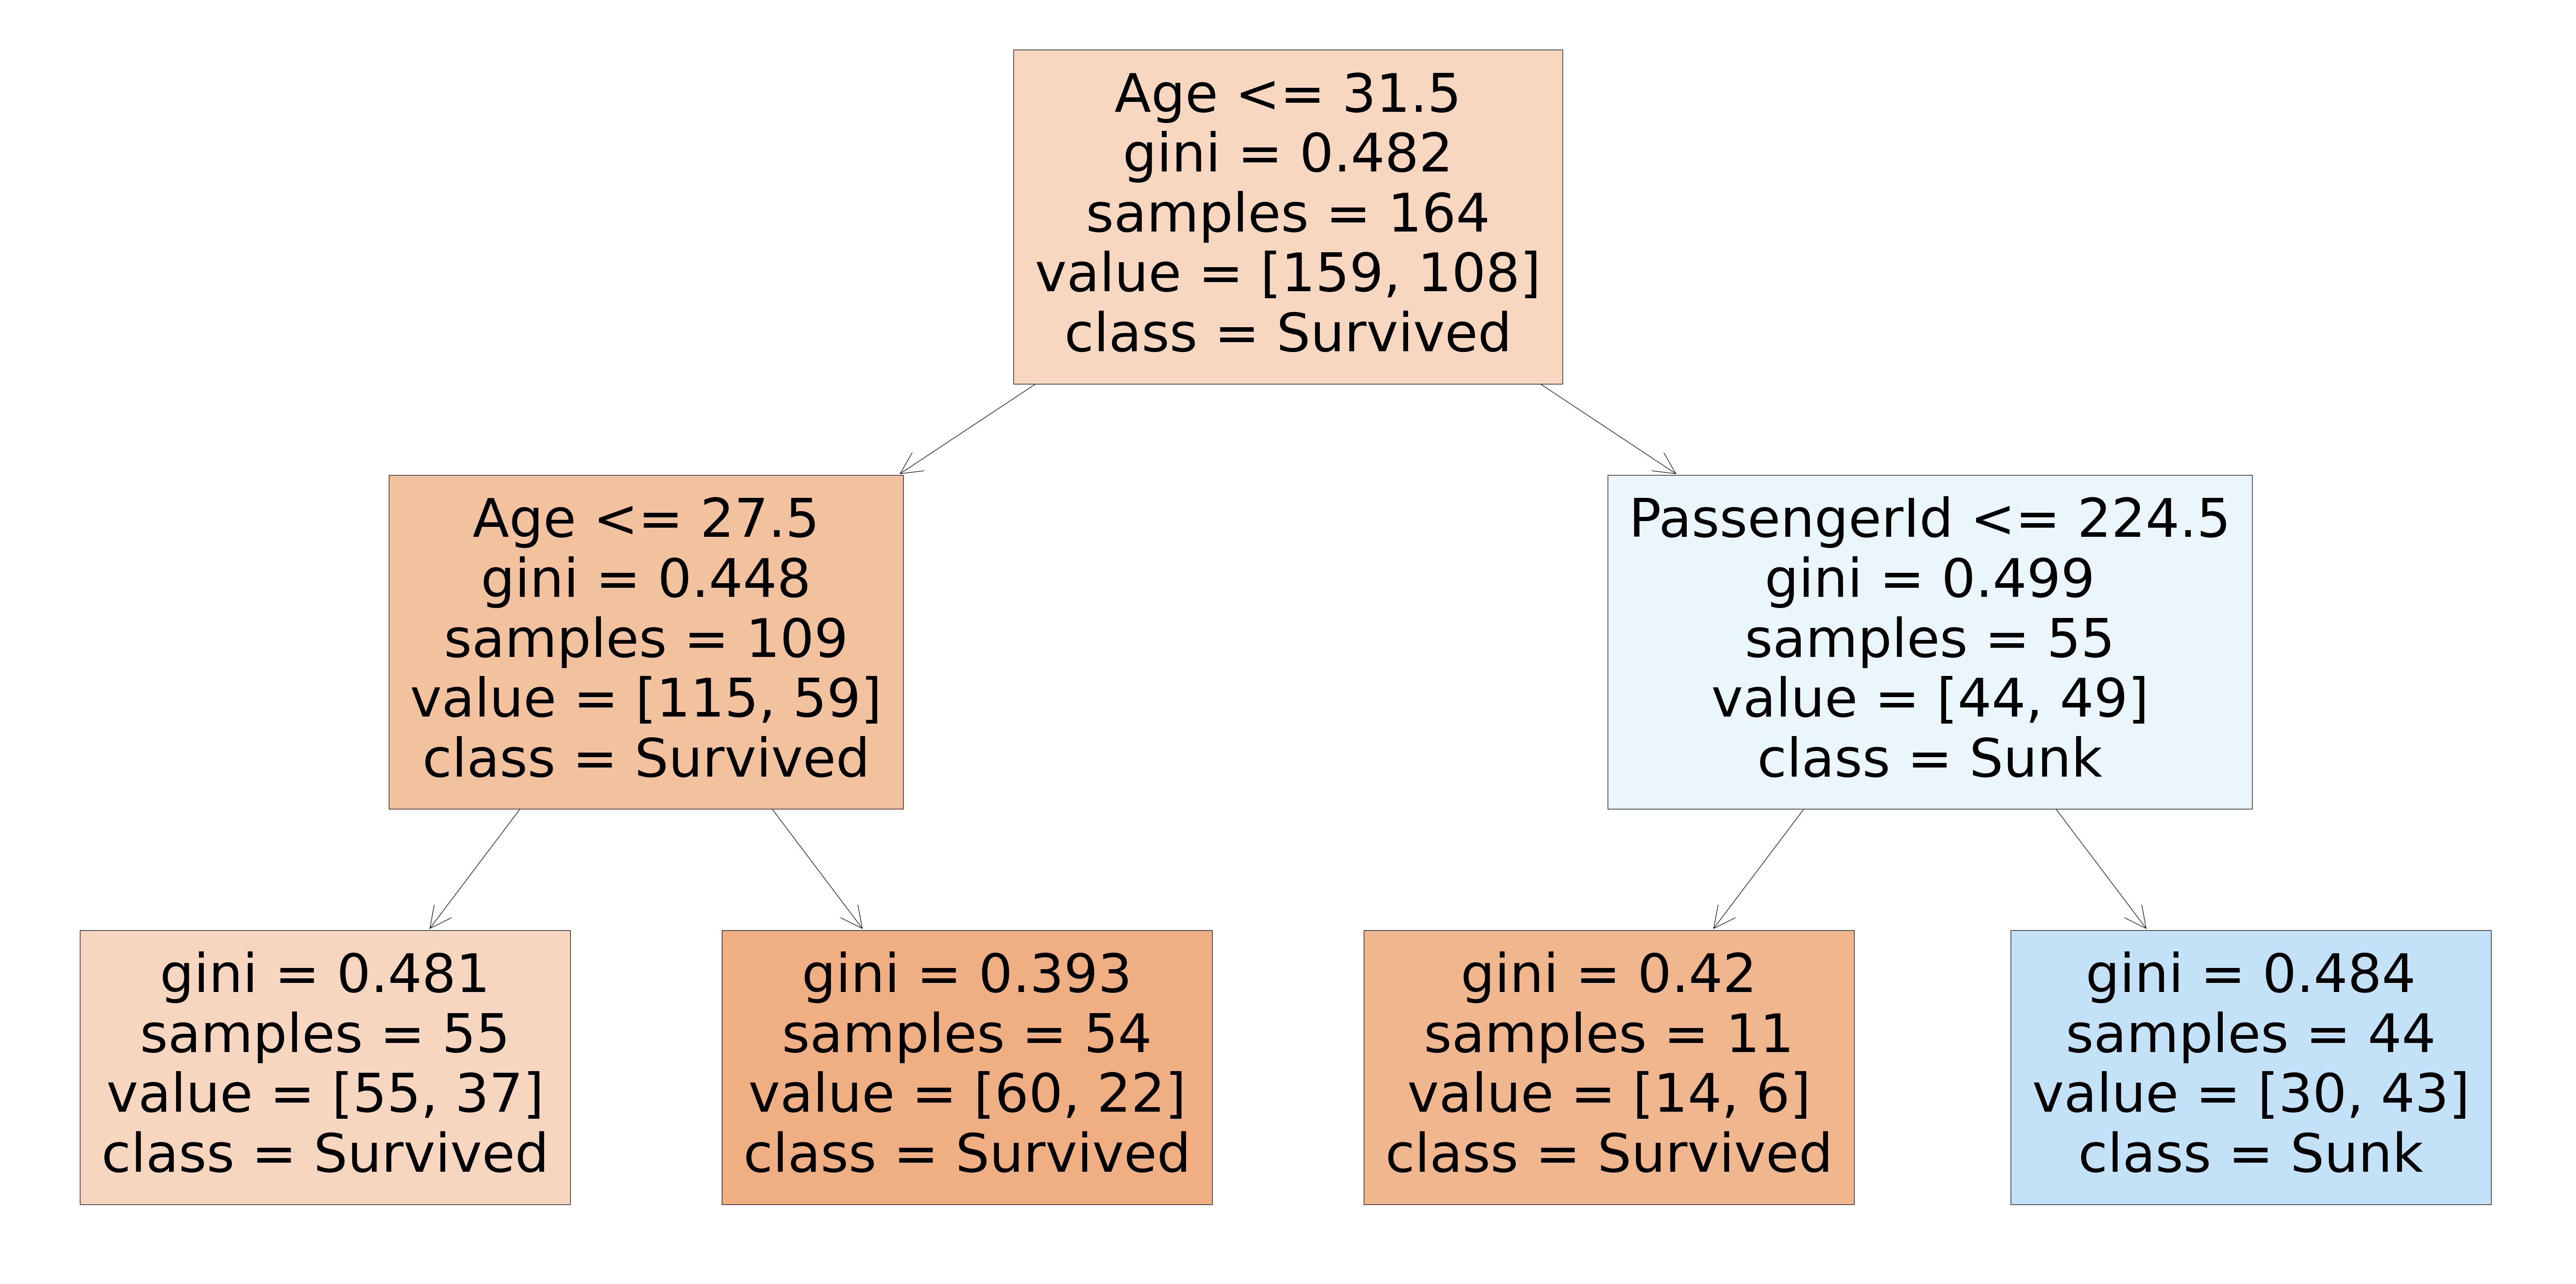

In [65]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[9], feature_names = X.columns,class_names=['Survived', "Sunk"],filled=True)

[Text(0.5, 0.8333333333333334, 'PassengerId <= 775.5\ngini = 0.474\nsamples = 165\nvalue = [164, 103]\nclass = Survived'),
 Text(0.25, 0.5, 'PassengerId <= 222.5\ngini = 0.488\nsamples = 142\nvalue = [134, 98]\nclass = Survived'),
 Text(0.125, 0.16666666666666666, 'gini = 0.363\nsamples = 39\nvalue = [48, 15]\nclass = Survived'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 103\nvalue = [86, 83]\nclass = Survived'),
 Text(0.75, 0.5, 'Age <= 27.5\ngini = 0.245\nsamples = 23\nvalue = [30, 5]\nclass = Survived'),
 Text(0.625, 0.16666666666666666, 'gini = 0.291\nsamples = 10\nvalue = [14, 3]\nclass = Survived'),
 Text(0.875, 0.16666666666666666, 'gini = 0.198\nsamples = 13\nvalue = [16, 2]\nclass = Survived')]

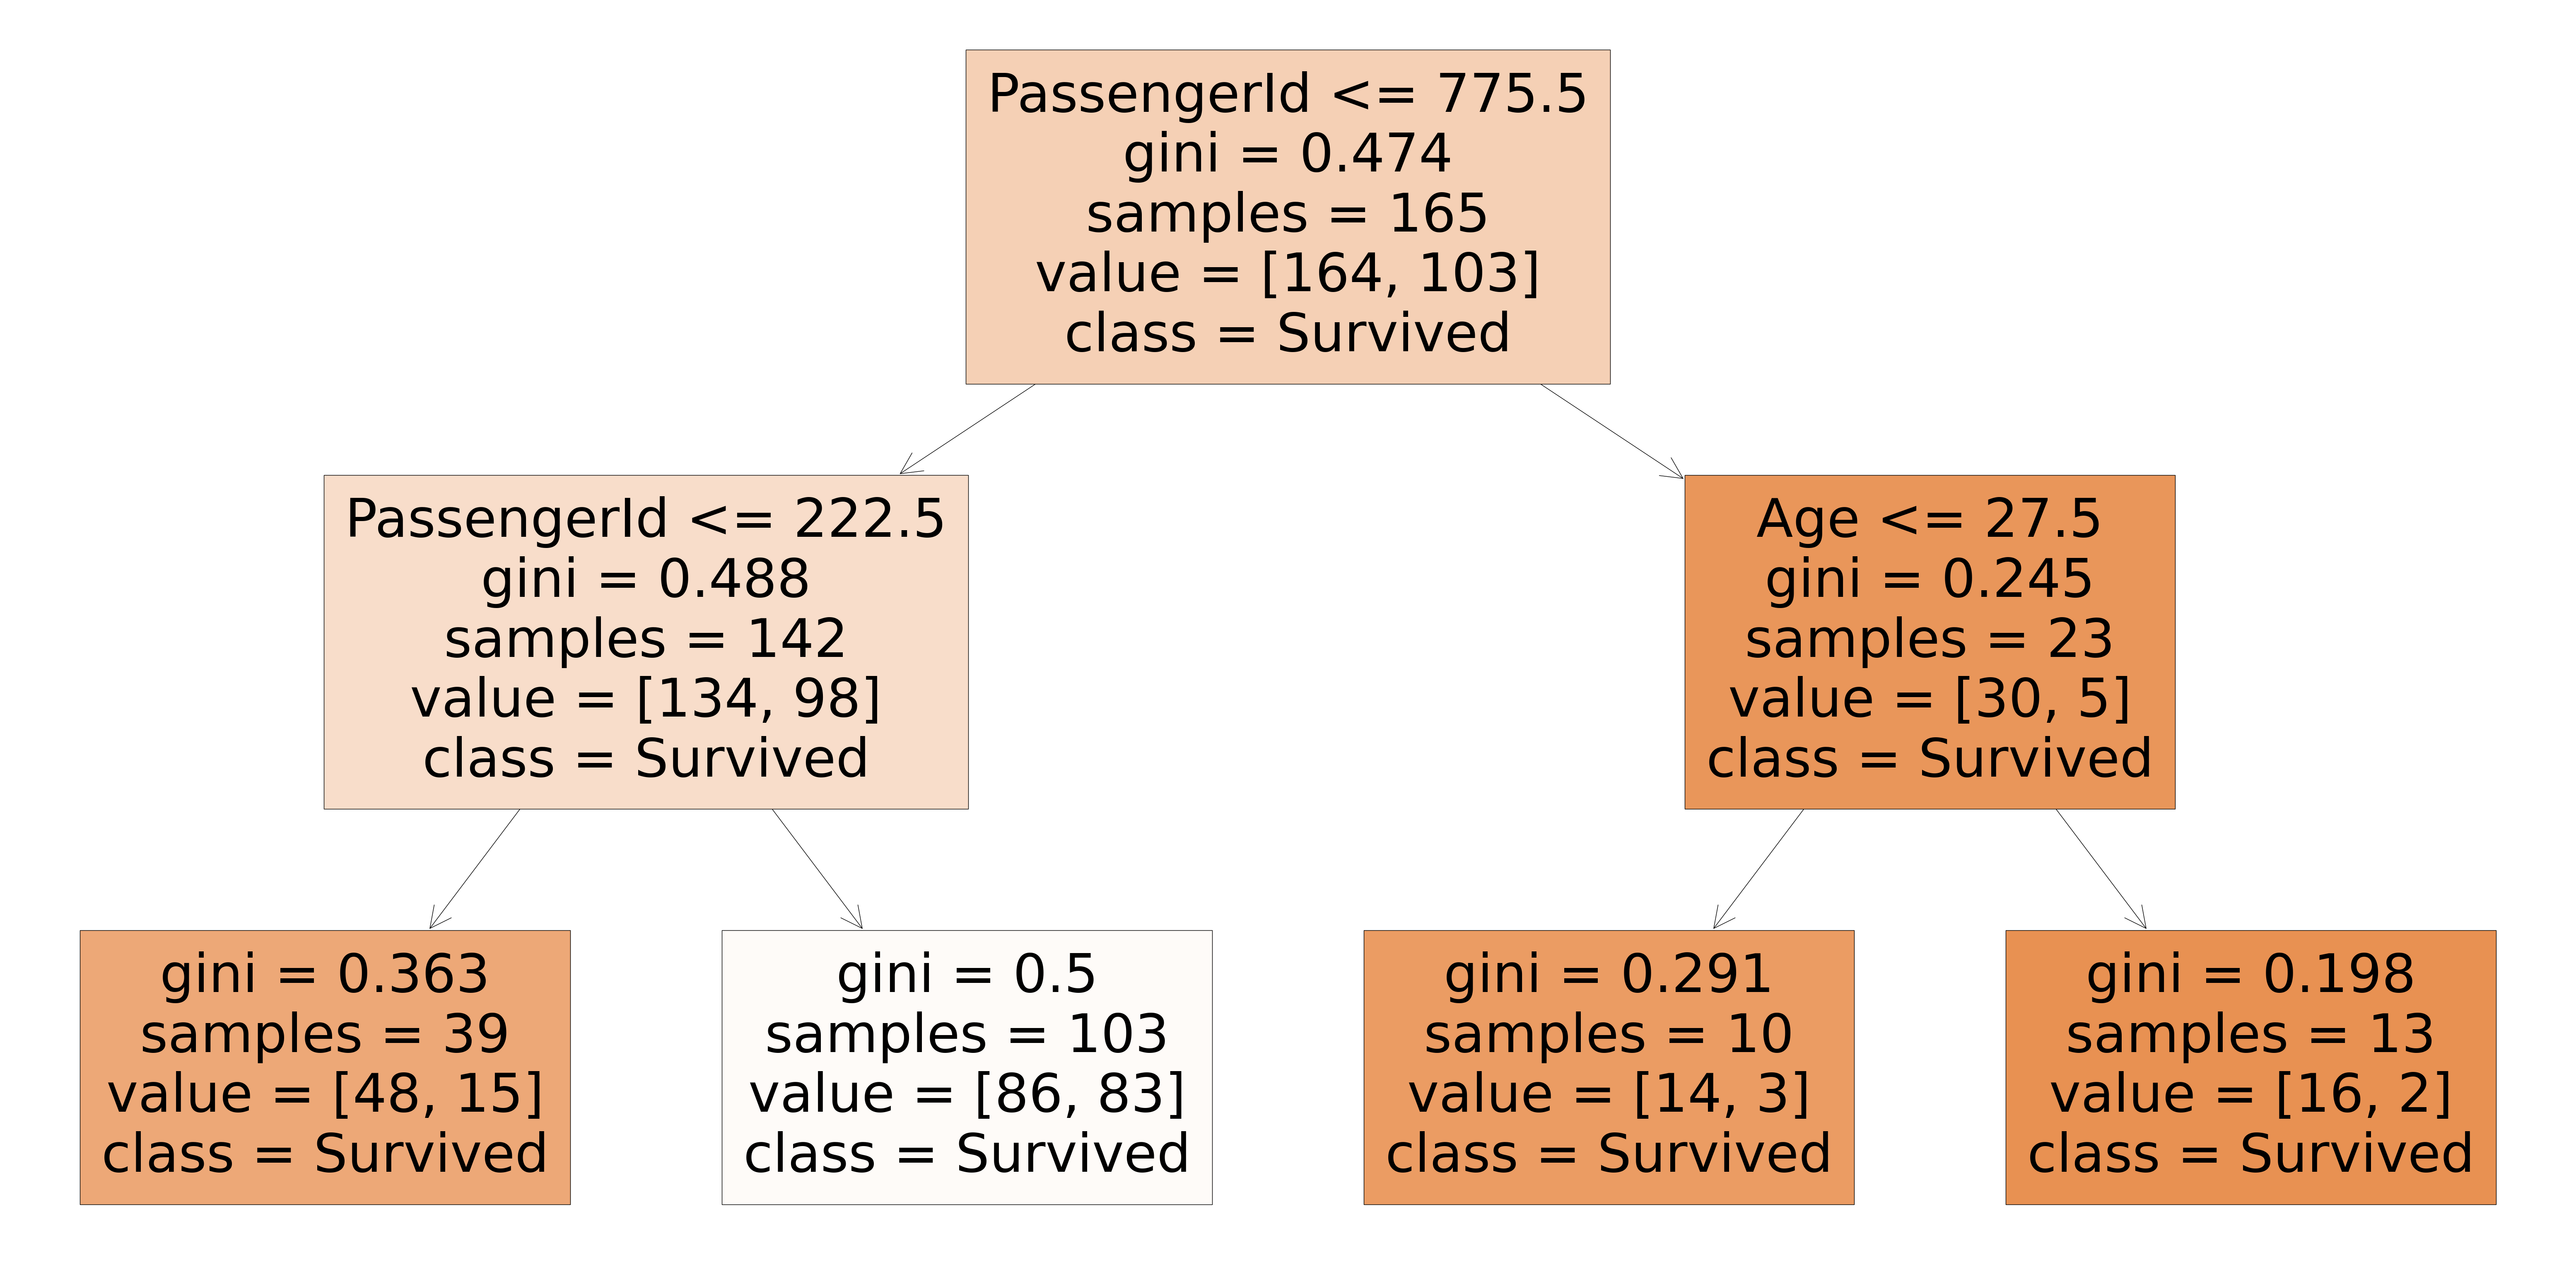

In [66]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Survived', "Sunk"],filled=True)


In [67]:
rf_best.feature_importances_


array([0.08440858, 0.16106153, 0.43952532, 0.08569316, 0.07224788,
       0.03274112, 0.12432241])

In [74]:
imp_df = pd.DataFrame({
"Feature": X_train.columns,
"Importance_percentage": (rf_best.feature_importances_)*100
})
imp_df.sort_values(by="Importance_percentage", ascending=False)#feminism!!!!!

,Feature,Importance_percentage
2,Sex,43.952532
1,Pclass,16.106153
6,Embarked,12.432241
3,Age,8.569316
0,PassengerId,8.440858
4,SibSp,7.224788
5,Parch,3.274112


In [78]:
from scipy.stats import randint
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
'n_estimators':np.arange(10, 500, step=50),
'max_features':randint(1,7),
'criterion':['gini','entropy'],
'min_samples_leaf':randint(1,4),
'min_samples_split':np.arange(2, 10, step=2)
}
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=4)


In [79]:
%%time
model_random = rf_random.fit(X_train, y_train)


CPU times: user 1.23 s, sys: 221 ms, total: 1.45 s
Wall time: 1min 33s
